### Лабораторная работа № 1 ###
#### Разведочный анализ данных. Исследование и визуализация данных. ####

Выполнил: Мокренко Никита ИУ5-64

# 1) Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 


In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('./data/master.csv')

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(27820, 12)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 27820


In [6]:
# Список колонок
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

country - 0
year - 0
sex - 0
age - 0
suicides_no - 0
population - 0
suicides/100k pop - 0
country-year - 0
HDI for year - 19456
 gdp_for_year ($)  - 0
gdp_per_capita ($) - 0
generation - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
# Определим уникальные значения для целевого признака
data['suicides/100k pop'].unique()

array([ 6.71,  5.19,  4.83, ..., 47.86, 40.75, 26.61])

In [11]:
unique_quant = data['suicides/100k pop'].unique()
print(unique_quant.__len__())

5298


Целевой признак имеет тип float64 и содержит 5298 уникальных значений.

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

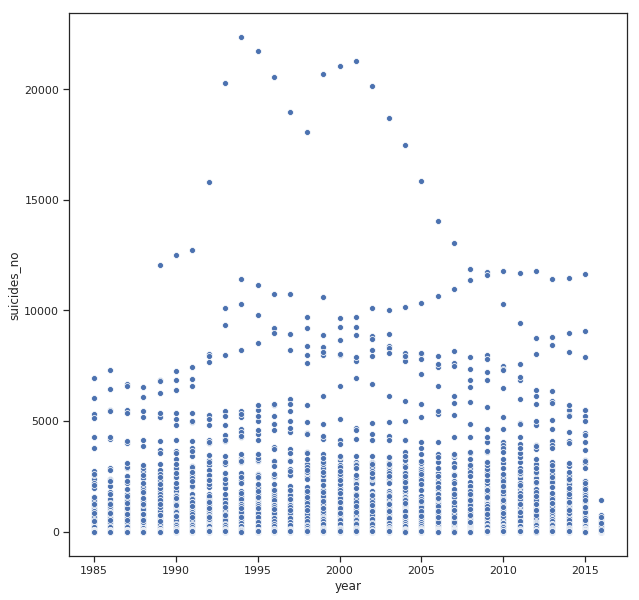

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, y='suicides_no', x='year', data=data)

Посмотрим насколько на эту зависимость влияет целевой признак.

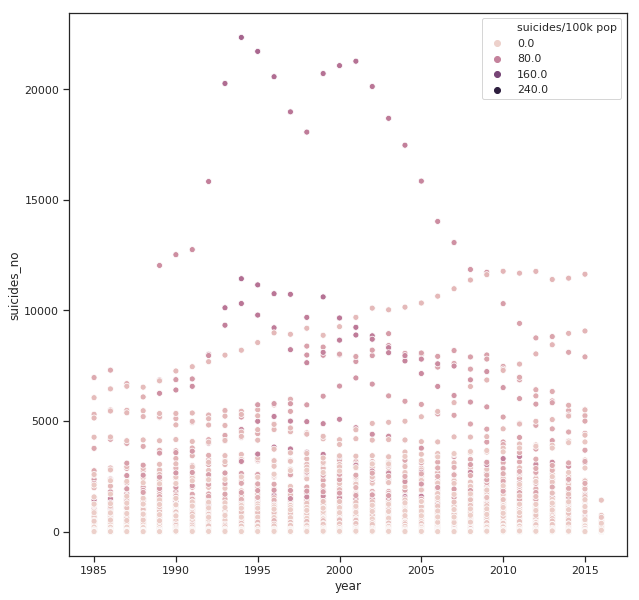

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='suicides_no', data=data, hue='suicides/100k pop')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

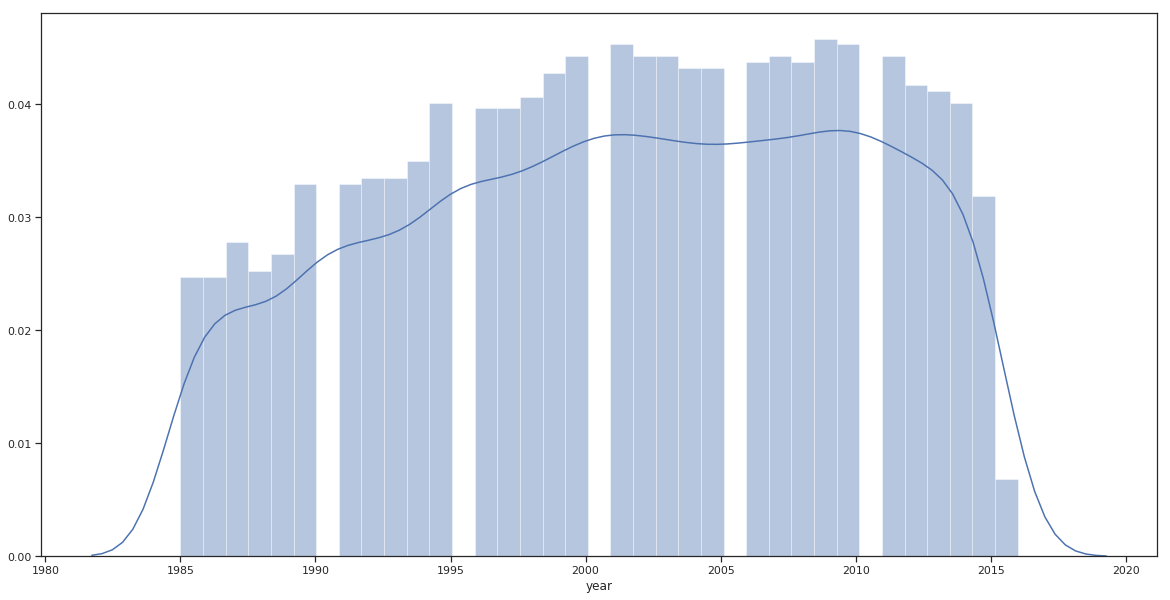

In [14]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.distplot(data['year'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

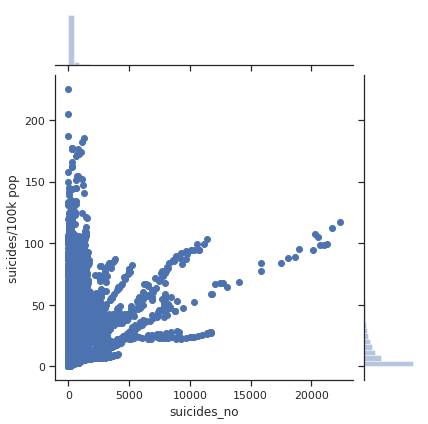

In [15]:
sns.jointplot(x='suicides_no', y='suicides/100k pop', data=data)

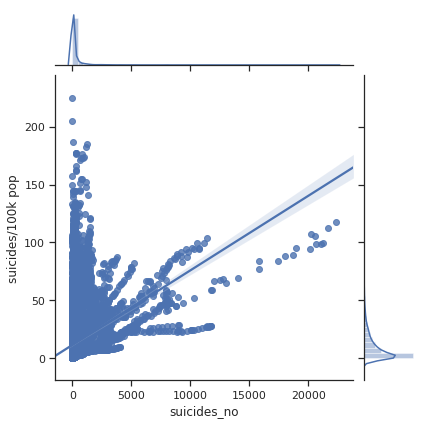

In [16]:
sns.jointplot(x='suicides_no', y='suicides/100k pop', data=data, kind="reg")

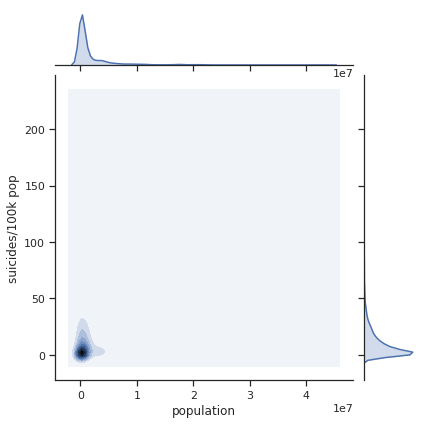

In [17]:
sns.jointplot(x='population', y='suicides/100k pop', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


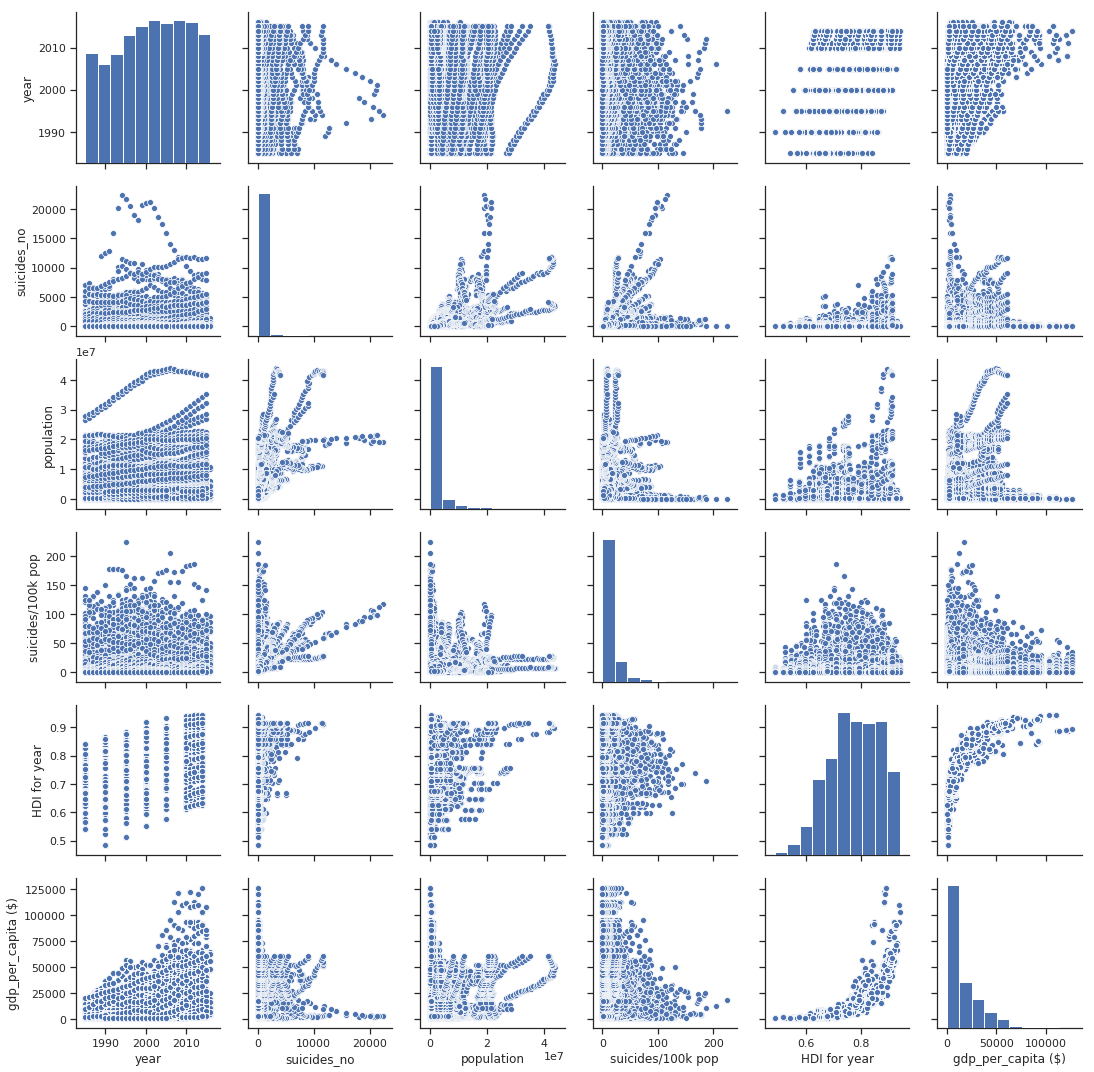

In [18]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

In [19]:
#sns.pairplot(data, hue="year")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

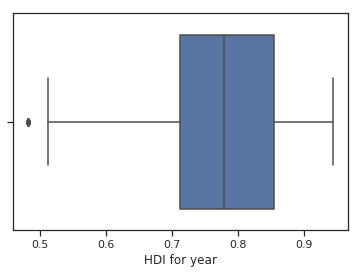

In [20]:
sns.boxplot(x=data['HDI for year'])

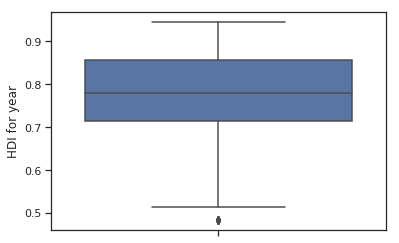

In [21]:
# По вертикали
sns.boxplot(y=data['HDI for year'])

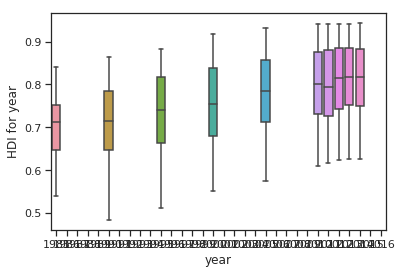

In [22]:
# Распределение параметра HDI for year сгруппированные по year.
sns.boxplot(x='year', y='HDI for year', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

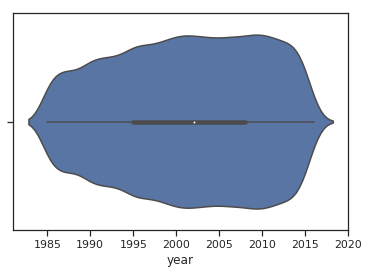

In [23]:
sns.violinplot(x=data['year'])

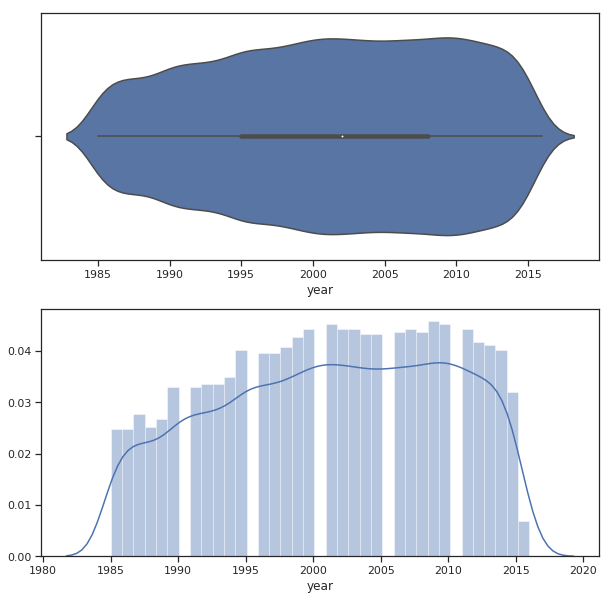

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['year'])
sns.distplot(data['year'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

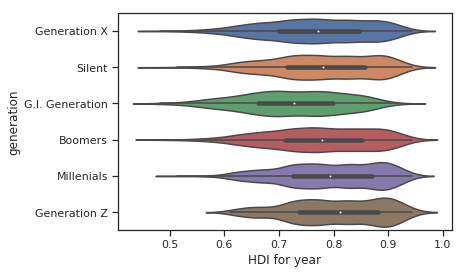

In [25]:
# Распределение параметра HDI for year сгруппированные по generation.
sns.violinplot(x='HDI for year', y='generation', data=data)

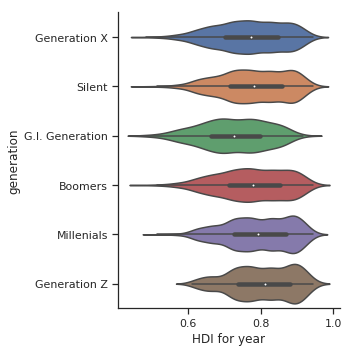

In [26]:
sns.catplot(y='generation', x='HDI for year', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [27]:
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [28]:
data.corr(method='pearson')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


In [29]:
data.corr(method='kendall')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.002866,0.009748,-0.019777,0.234793,0.240563
suicides_no,-0.002866,1.000000,0.590450,0.550809,0.121828,0.067134
population,0.009748,0.590450,1.000000,0.141212,0.090117,0.047260
suicides/100k pop,-0.019777,0.550809,0.141212,1.000000,0.099305,0.047641
HDI for year,0.234793,0.121828,0.090117,0.099305,1.000000,0.762445
gdp_per_capita ($),0.240563,0.067134,0.047260,0.047641,0.762445,1.000000


In [30]:
data.corr(method='spearman')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004146,0.014215,-0.029178,0.329094,0.349895
suicides_no,-0.004146,1.000000,0.775580,0.724183,0.184755,0.100735
population,0.014215,0.775580,1.000000,0.215128,0.133076,0.070745
suicides/100k pop,-0.029178,0.724183,0.215128,1.000000,0.152627,0.073063
HDI for year,0.329094,0.184755,0.133076,0.152627,1.000000,0.928608
gdp_per_capita ($),0.349895,0.100735,0.070745,0.073063,0.928608,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

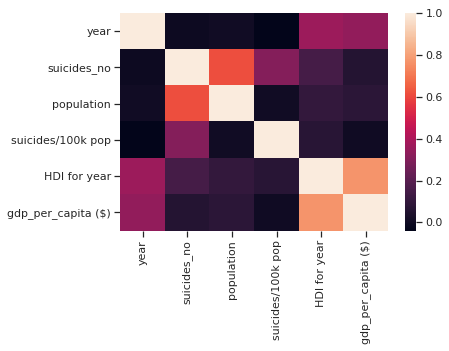

In [31]:
sns.heatmap(data.corr())

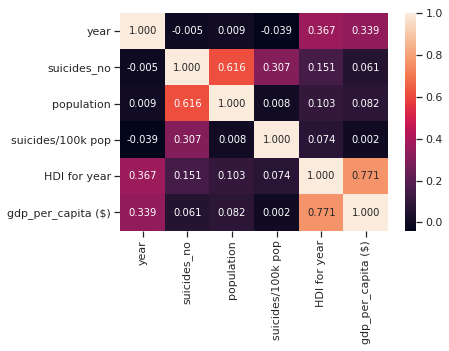

In [32]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

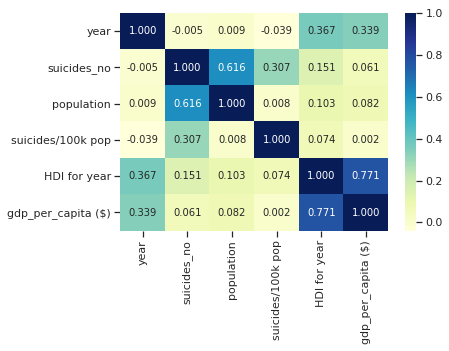

In [33]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

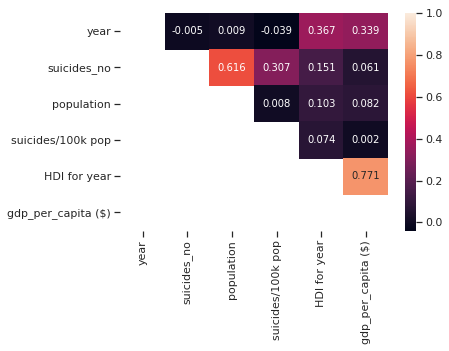

In [34]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

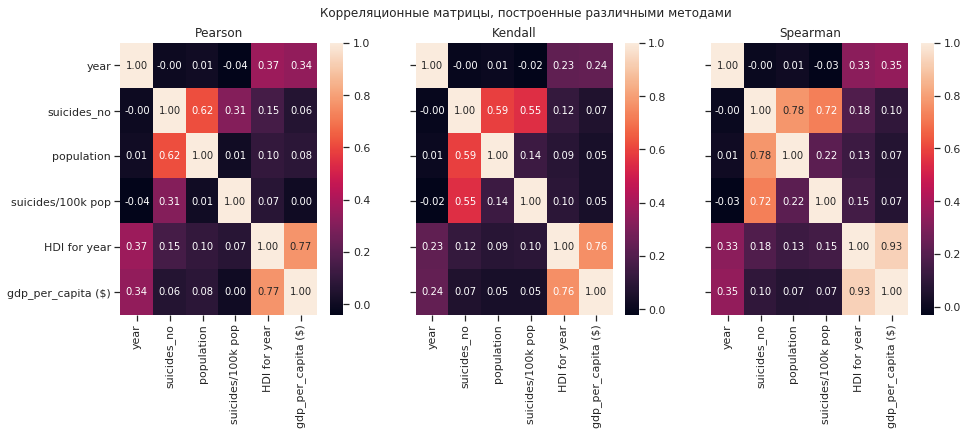

In [35]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')